In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(figsize = [10,8],dpi =100, facecolor='white',frameon = False)

import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import copy

vir = copy(mpl.cm.viridis)
vir.set_under("lightgray")

scanpy==1.9.1 anndata==0.8.0 umap==0.5.1 numpy==1.20.3 scipy==1.7.3 pandas==1.3.3 scikit-learn==1.0.2 statsmodels==0.13.0rc0 python-igraph==0.9.6 louvain==0.7.0 pynndescent==0.5.4


In [ ]:
adata = sc.read_h5ad('SGN_realign.h5ad')
adata = adata[(adata.obs['age'] == 'P21') & (~adata.obs['sample'].isin(['P21-HET-A','P21-HET-B'])),:]

In [3]:
adata.raw = adata
adata.layers['plot'] = np.log1p(adata.X)
adata.layers['count'] = adata.X.copy()

adata.obs_names_make_unique()

In [4]:
sc.pp.calculate_qc_metrics(adata,inplace =True)
adata = adata[:,adata.var['total_counts'] > 0]

In [5]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

/Users/babyv/Library/Python/3.7/lib/python/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [6]:
sc.pp.highly_variable_genes(adata,max_mean = 10)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [7]:
sc.pp.scale(adata)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


computing PCA
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.`
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


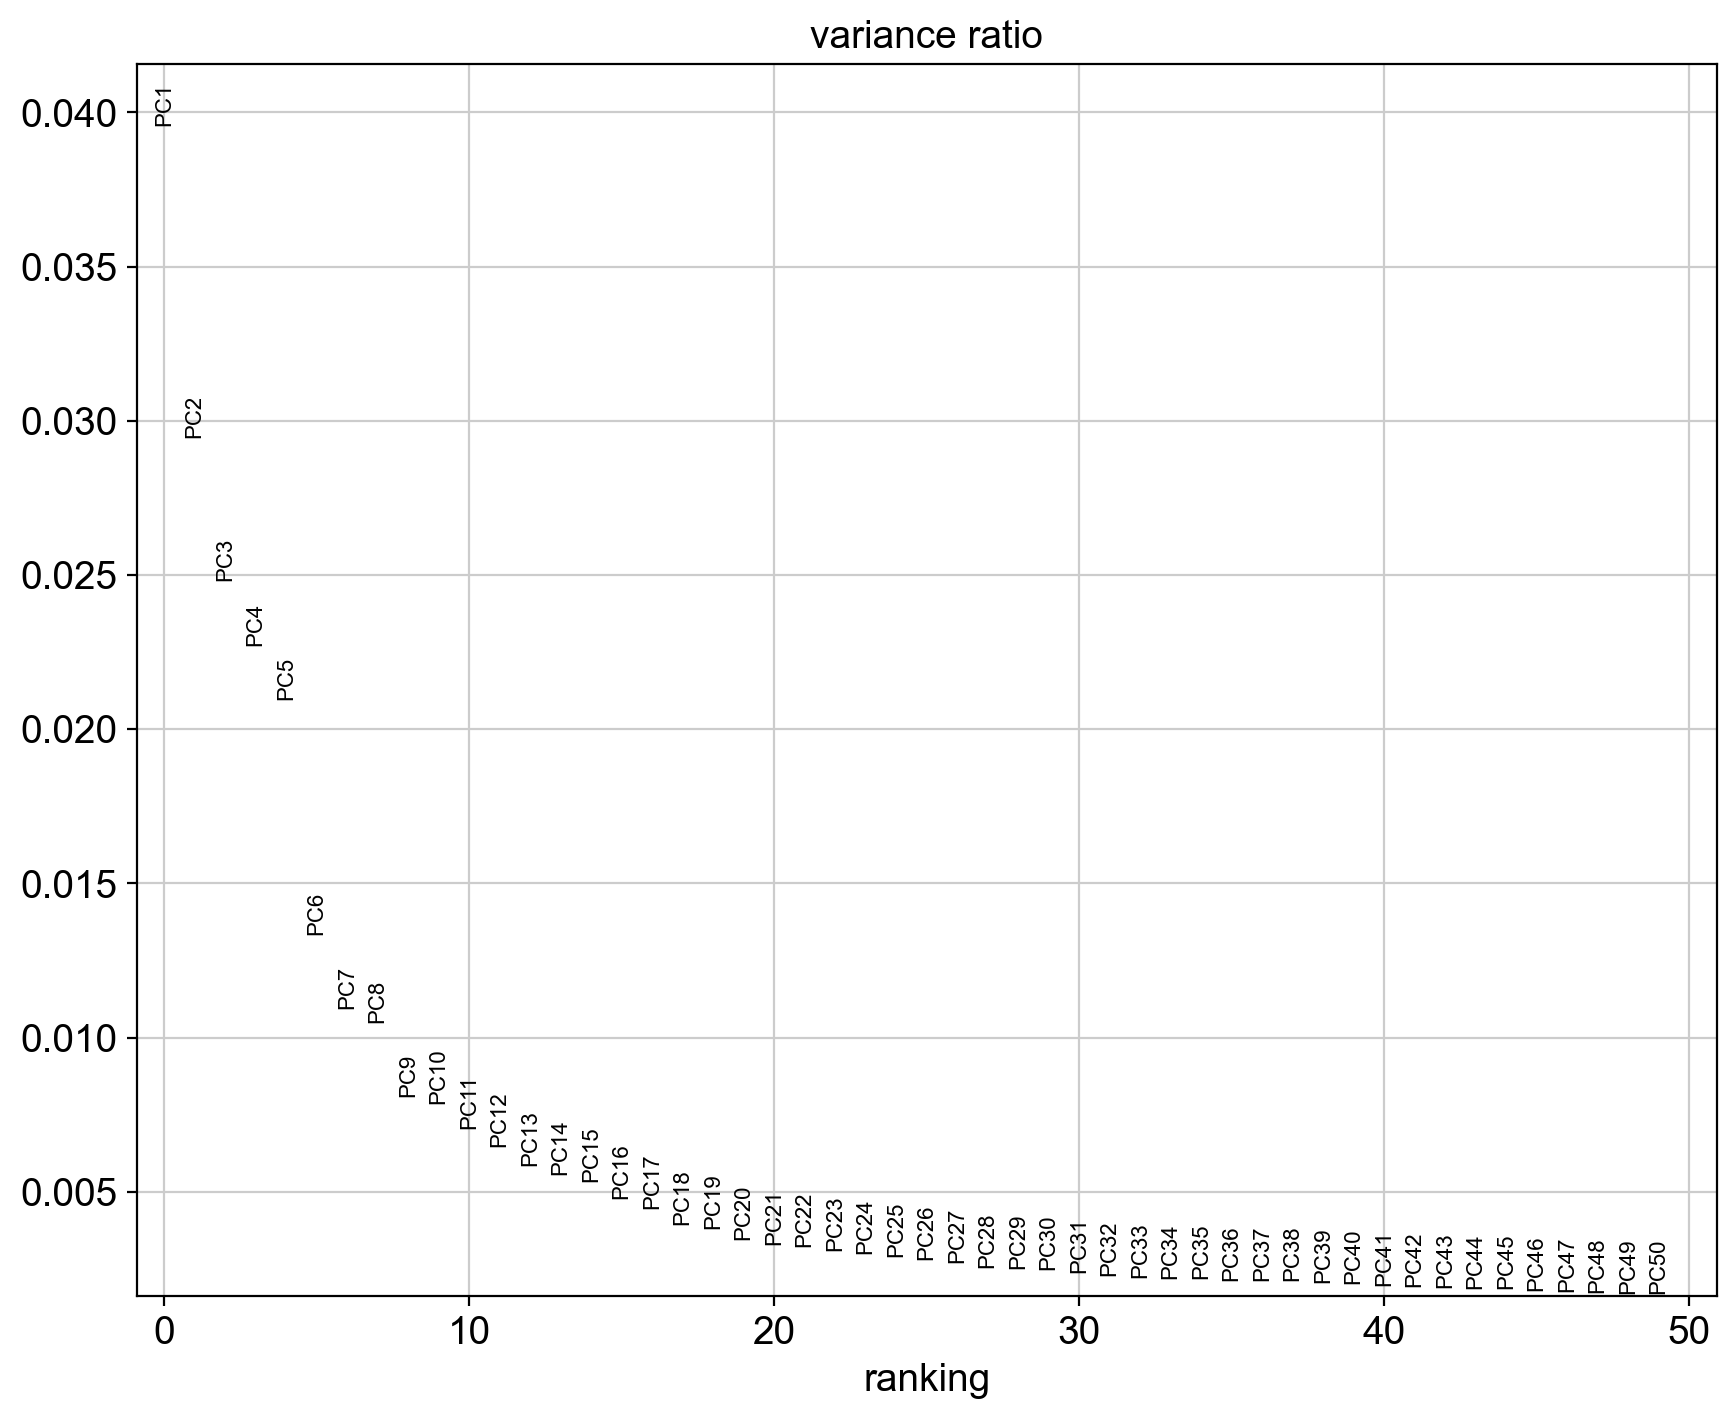

In [8]:
sc.tl.pca(adata,svd_solver = 'auto')
sc.pl.pca_variance_ratio(adata,n_pcs=50)

In [10]:
sc.pp.neighbors(adata,metric = 'sqeuclidean',n_pcs = 15,n_neighbors = 100)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)


In [11]:
sc.tl.umap(adata,min_dist = 0.3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


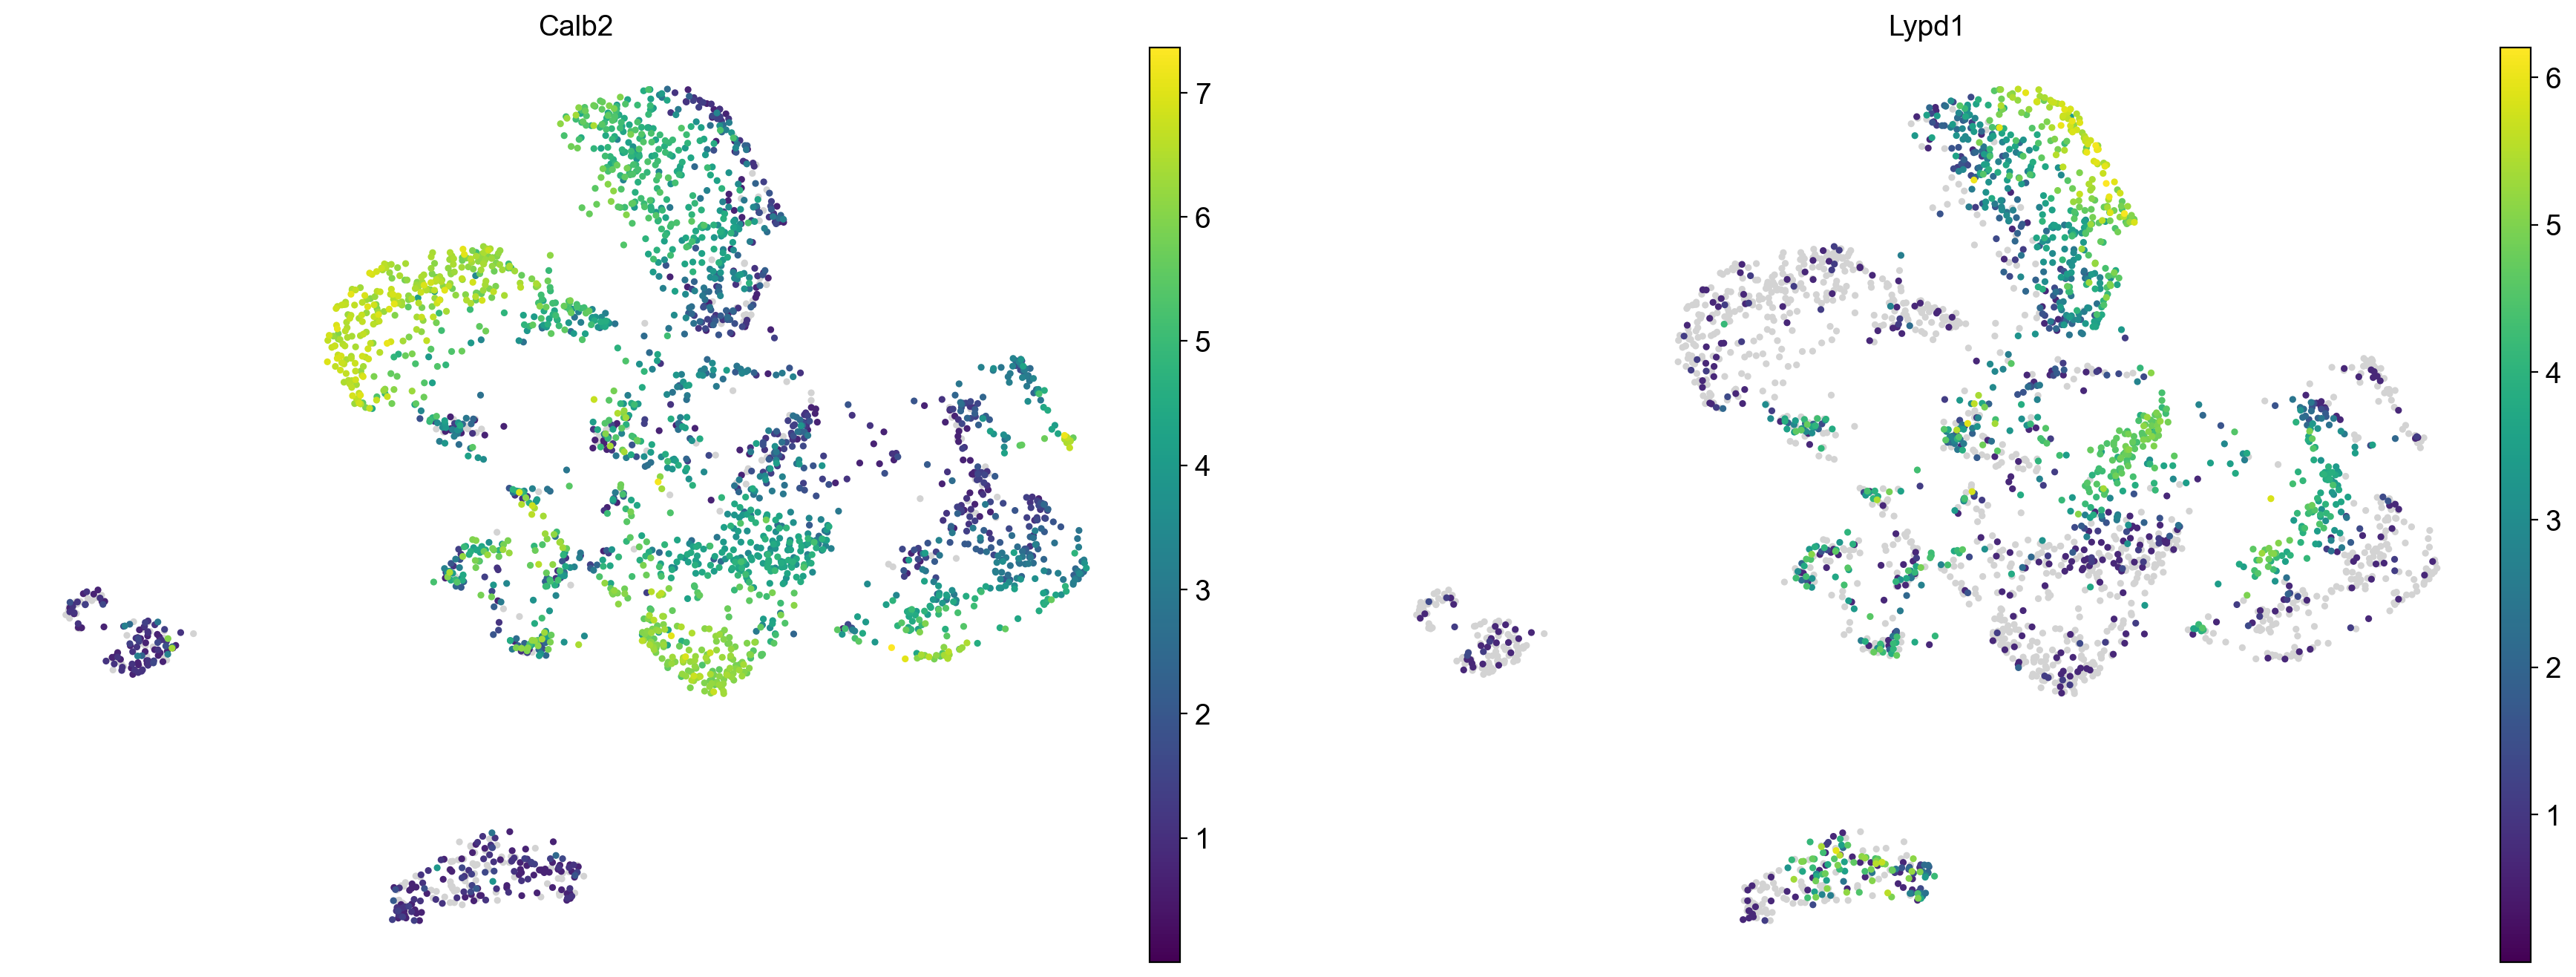

In [12]:
sc.pl.umap(adata,color = ['Calb2','Lypd1'],layer = 'plot',color_map = vir,vmin = 0.0000001)

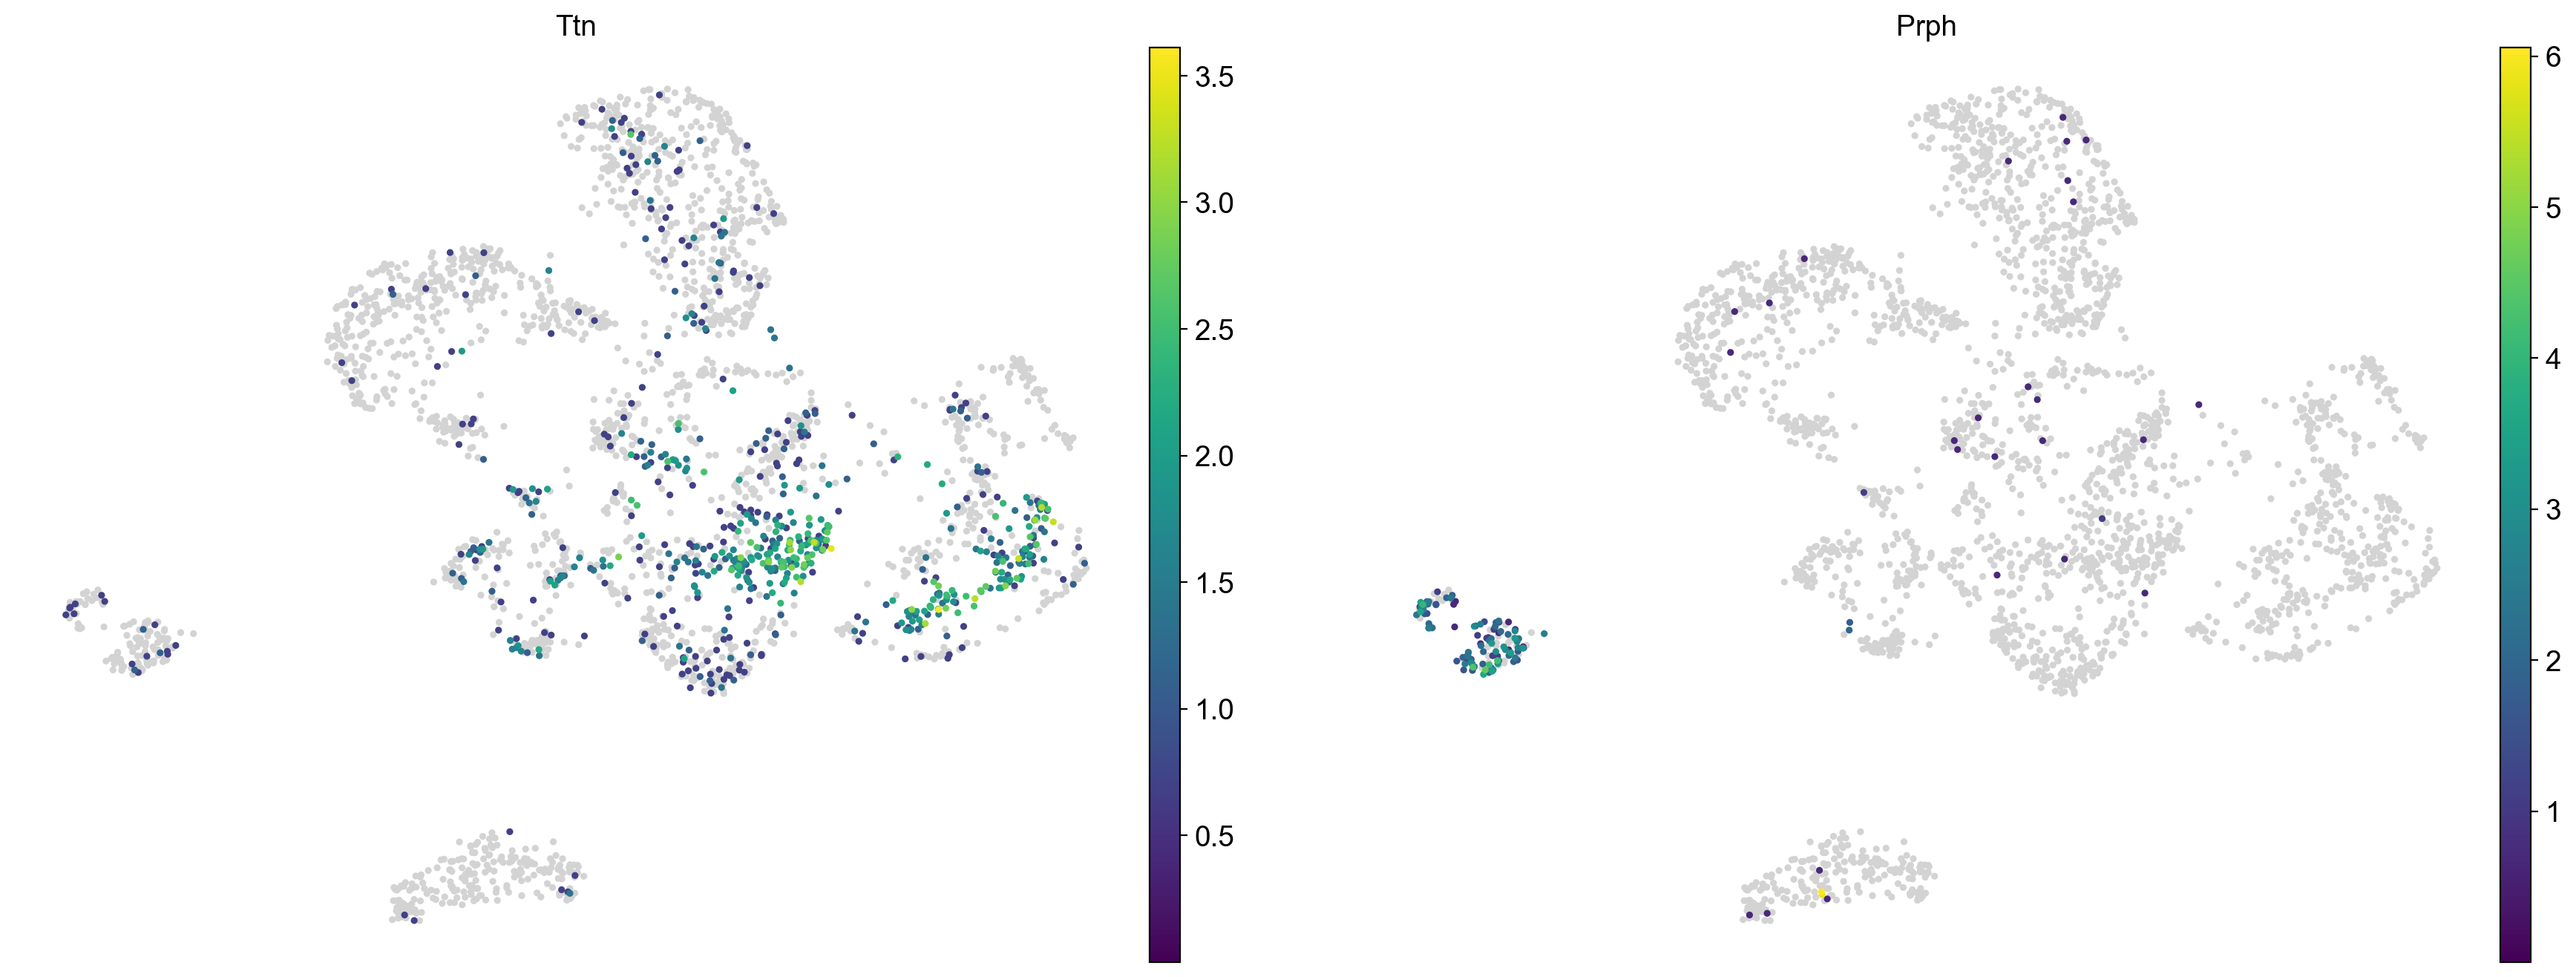

In [13]:
sc.pl.umap(adata,color = ['Ttn','Prph'],layer = 'plot',color_map = vir,vmin = 0.0000001)

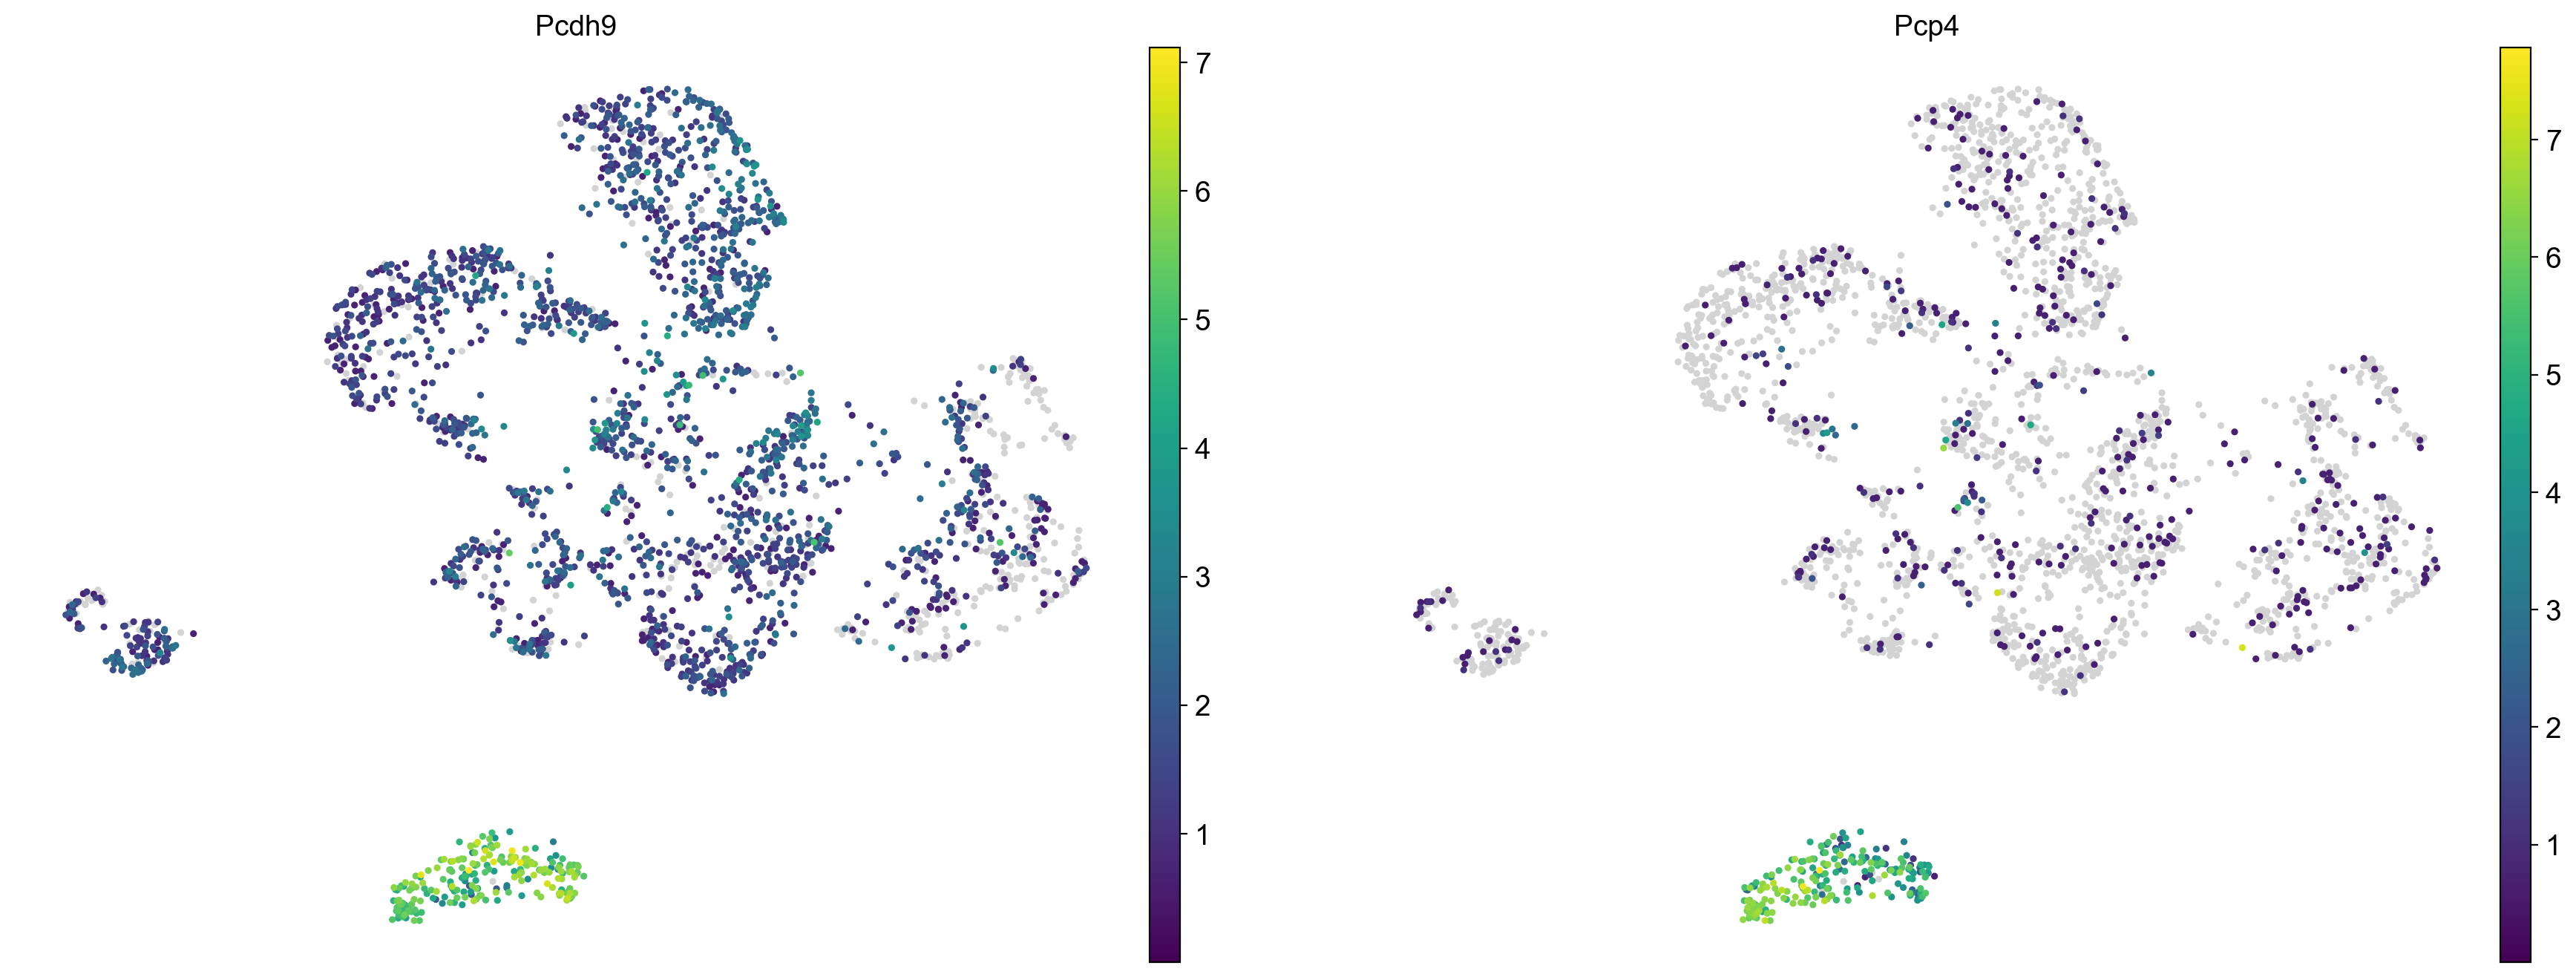

In [14]:
sc.pl.umap(adata,color = ['Pcdh9','Pcp4'],layer = 'plot',color_map = vir,vmin = 0.0000001)

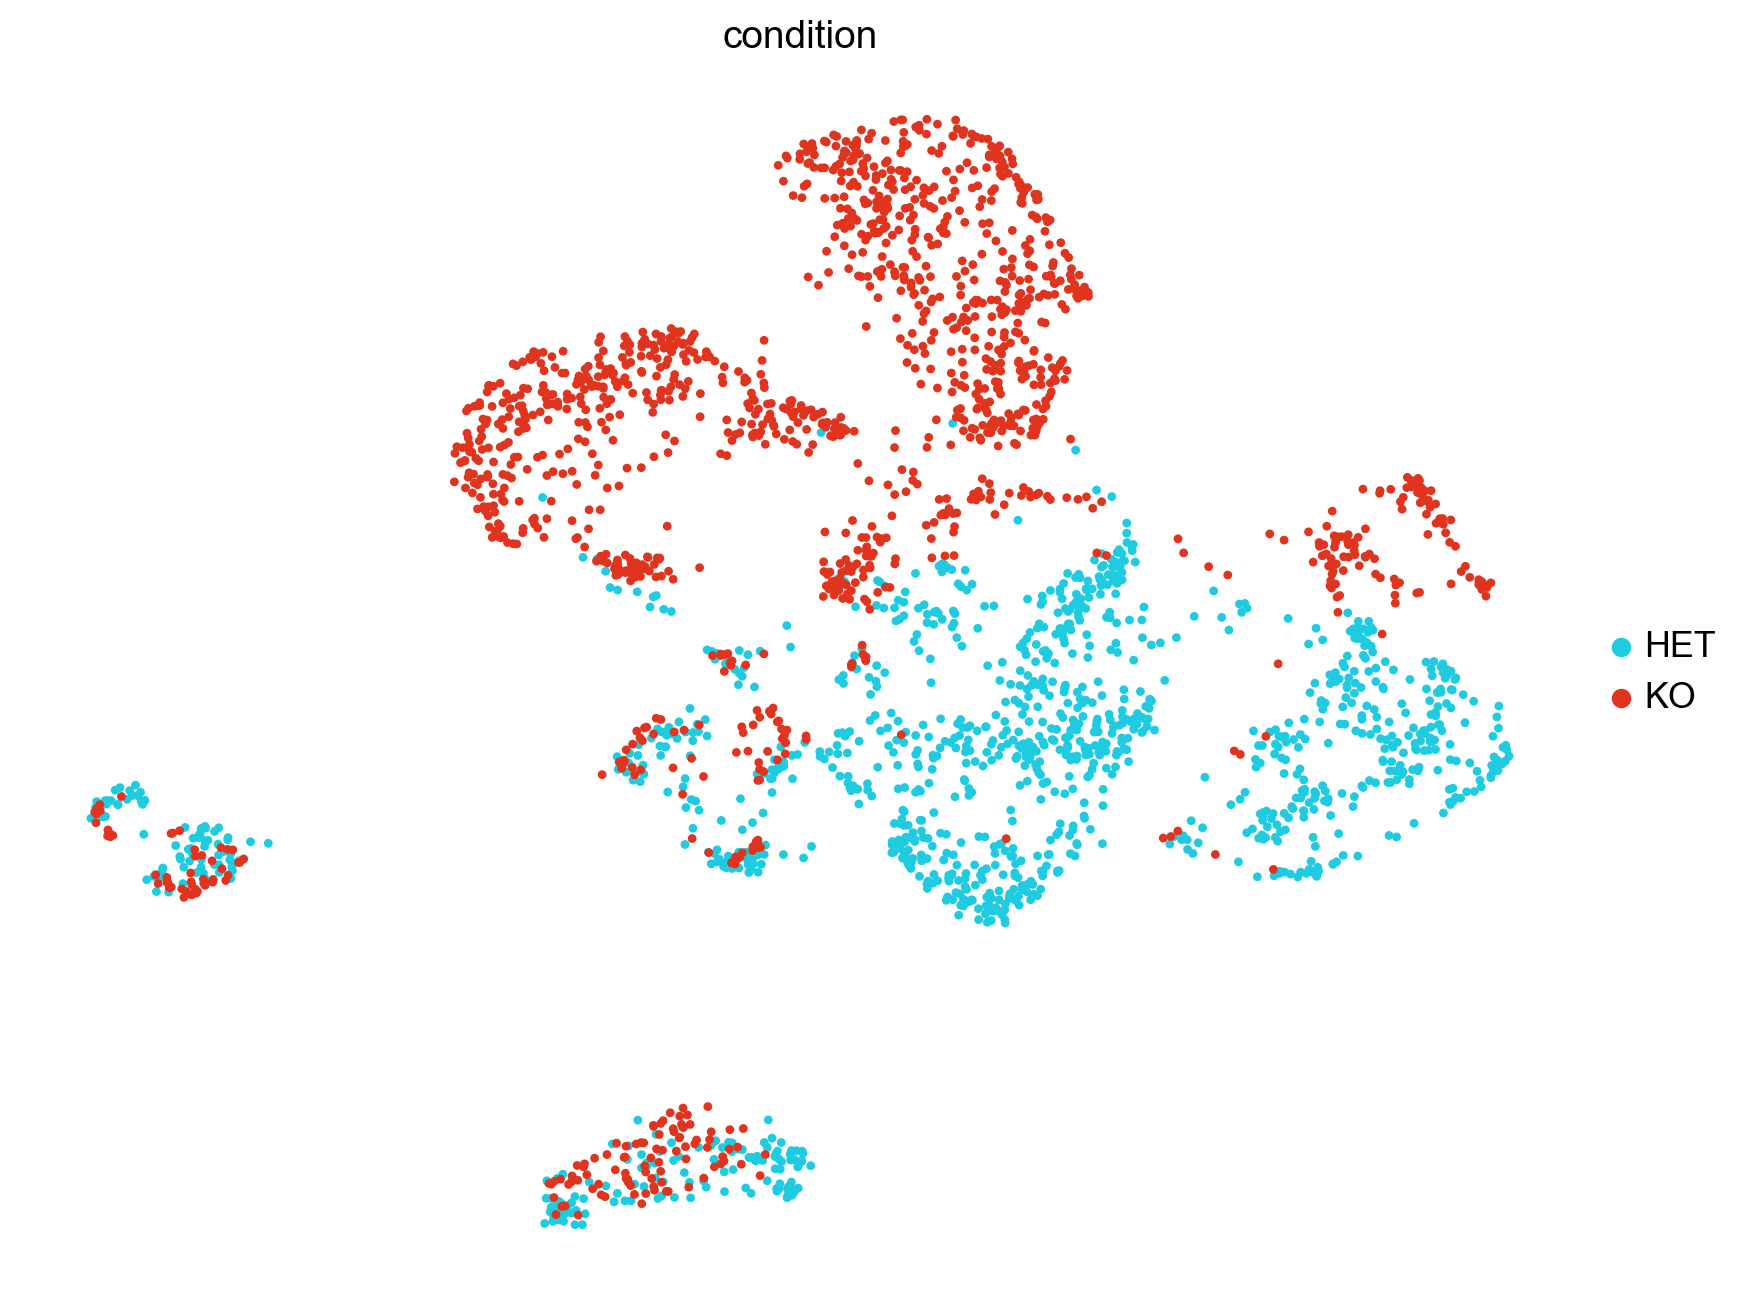

In [15]:
sc.pl.umap(adata,color = 'condition',size = 40,palette = ['#1ECBE1','#E1341E'],return_fig = True, show = False)
plt.savefig('P21_condition.pdf',bbox_inches = 'tight',dpi = 600)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 4 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


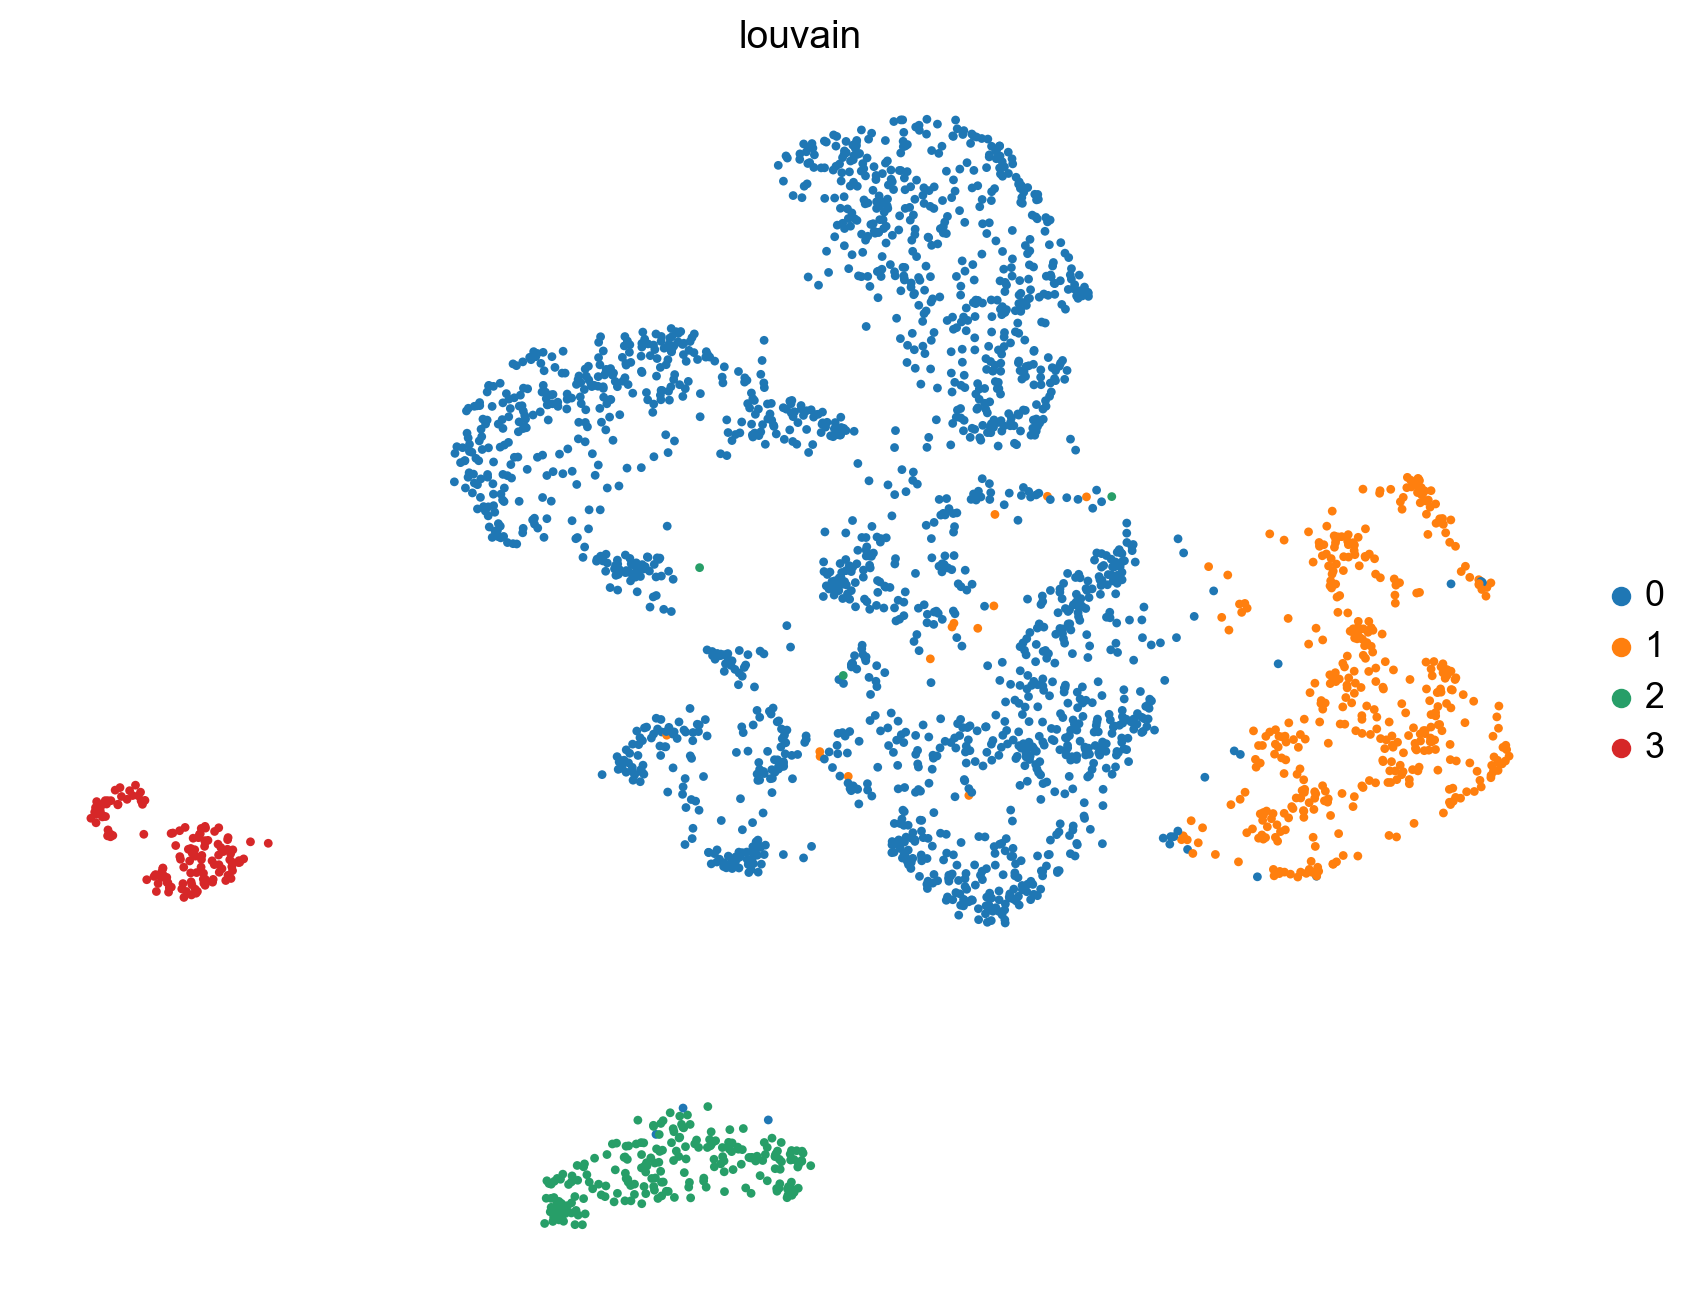

In [16]:
sc.tl.louvain(adata,resolution = 0.2)
sc.pl.umap(adata,color = 'louvain',size = 40)

In [17]:
adata.obs['celltype'] = 'Type I SGN'
adata.obs['celltype'][adata.obs['louvain'] == '3'] = 'Type II SGN'
adata.obs['celltype'][adata.obs['louvain'] == '2'] = 'Vestibular Neuron'

/Users/babyv/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/babyv/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


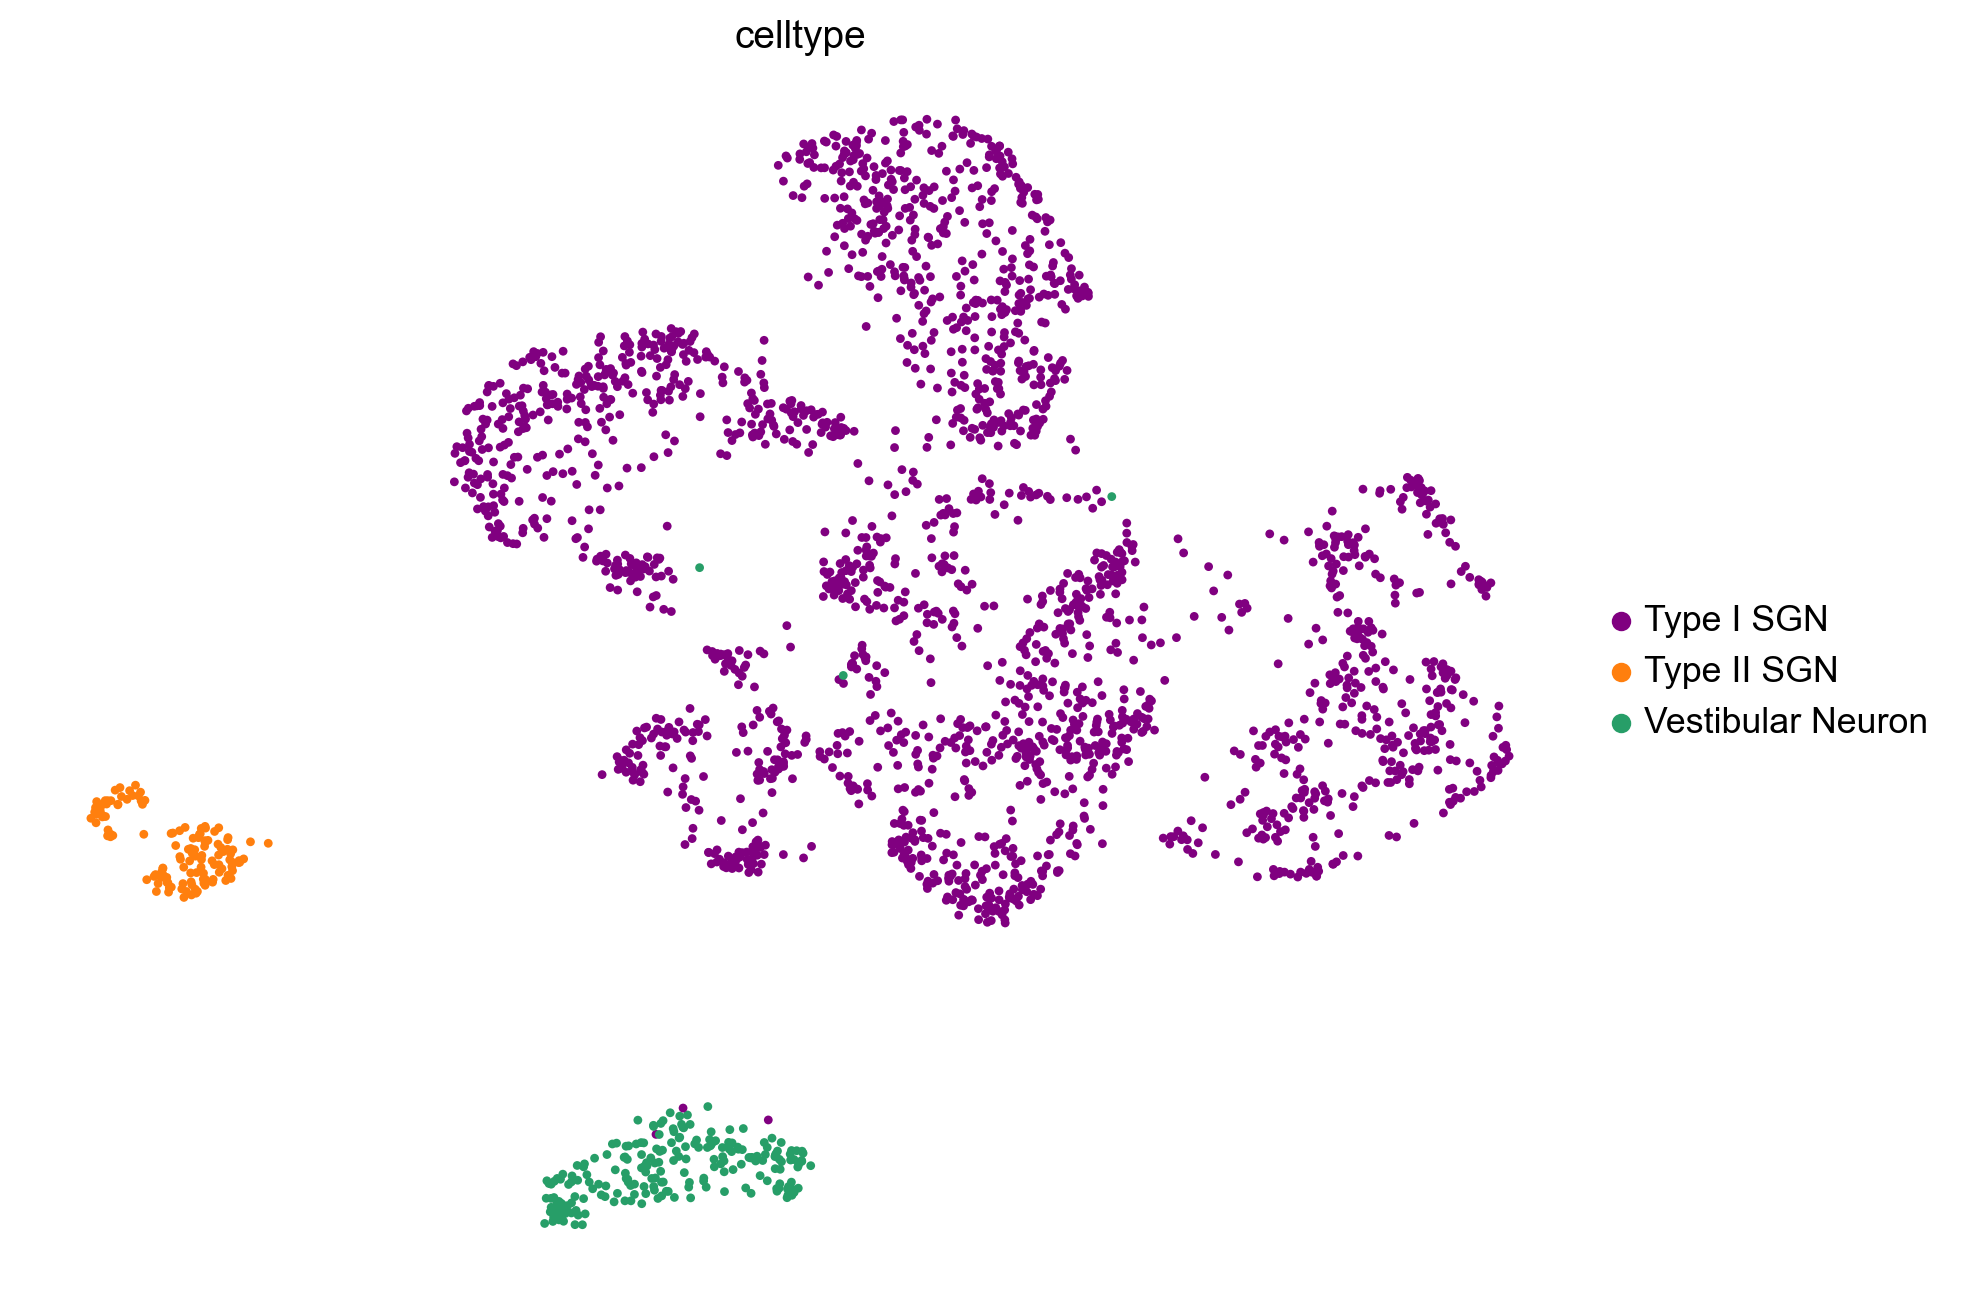

In [18]:
sc.pl.umap(adata,color = 'celltype',size = 40,palette = ['purple', '#ff7f0e', '#279e68'],return_fig = True, show = False)
plt.savefig('P21_celltype_v2.pdf',bbox_inches = 'tight',dpi = 600)

In [24]:
genes = ['Cox8b','Marcksl1','Nppc','Ttn','Btg2','Tmem132e','Atf3','Id1','Nectin1','Kcnip3','Rxrg','Bcl2l11',
        'Kcnd2','Gadd45b','Mir6236','Rn7sk','Socs3','Kif4','Calb1','Tmod1']

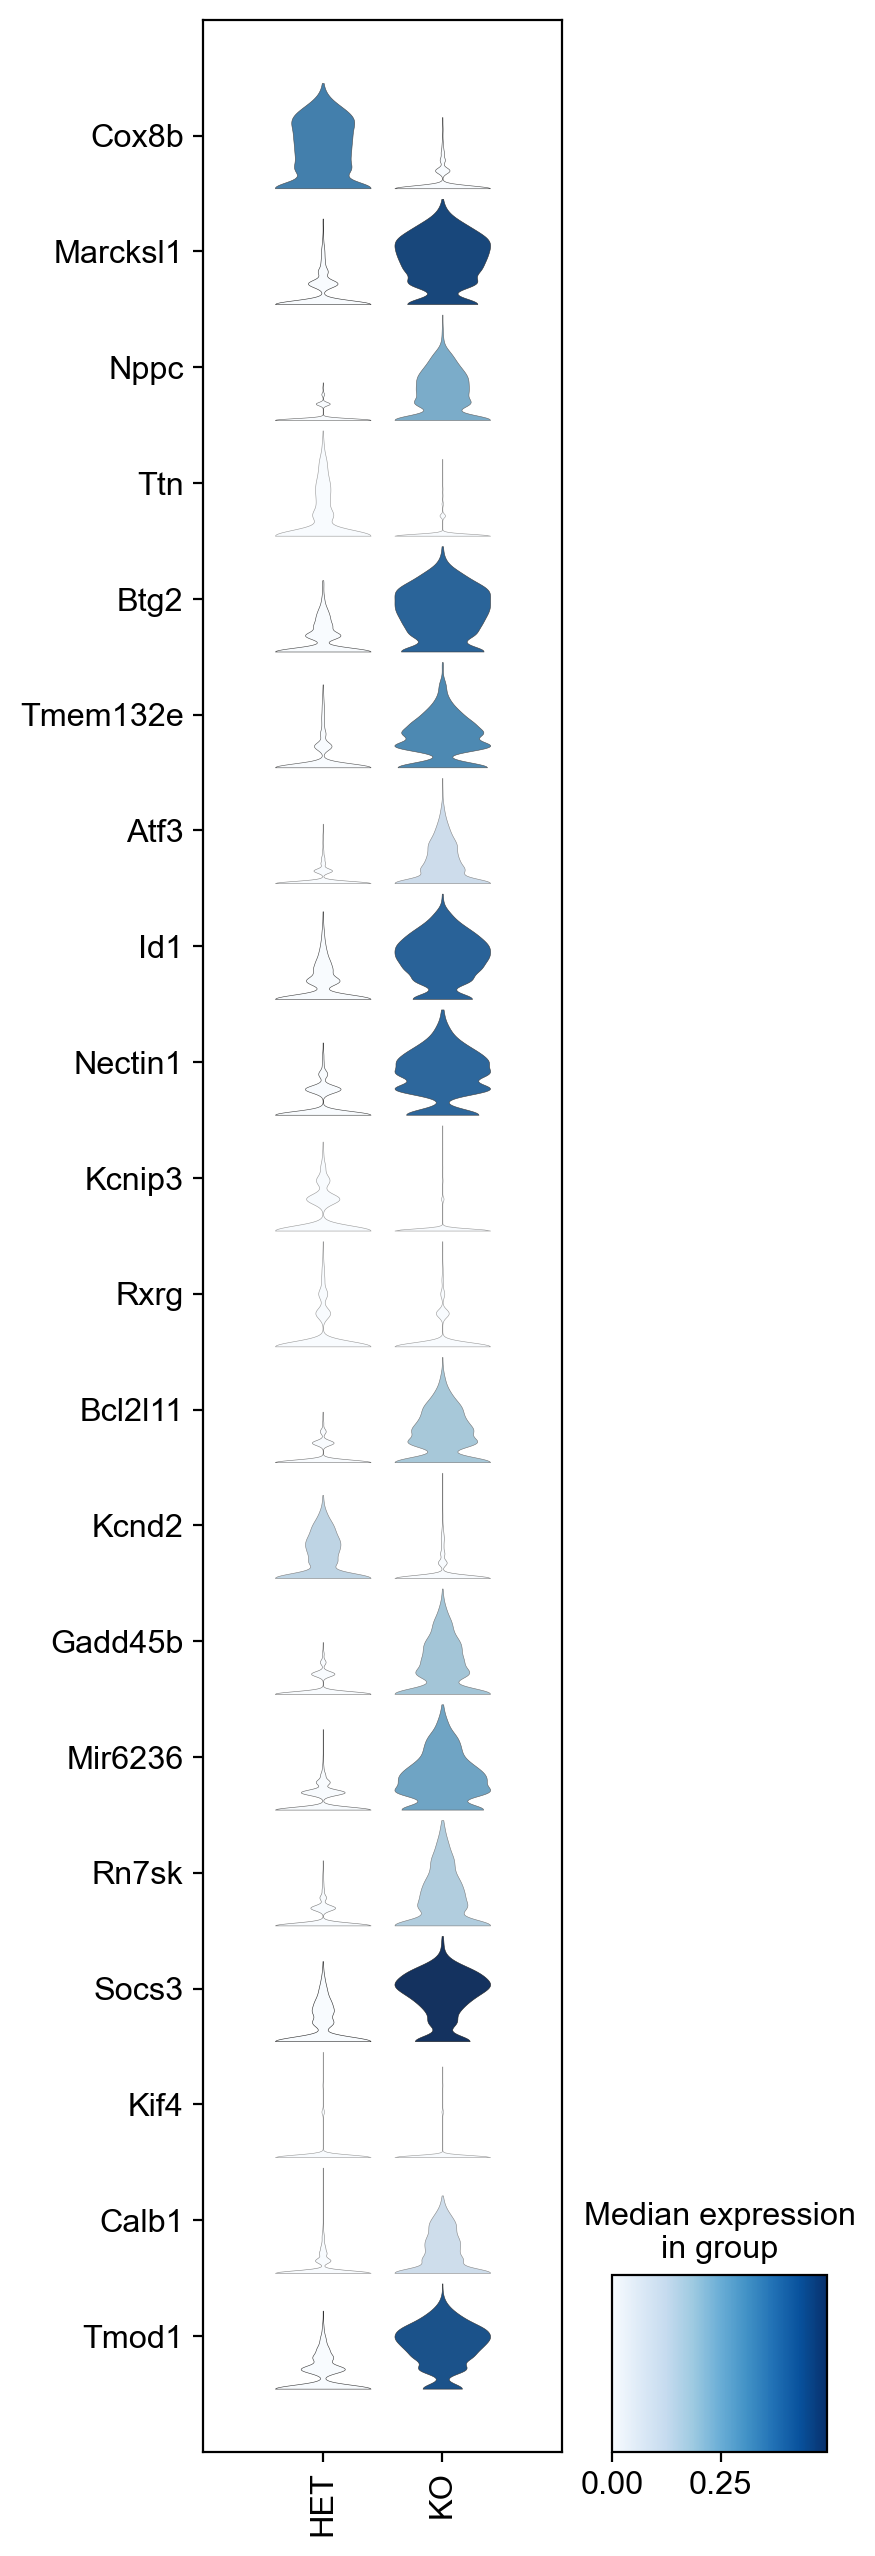

In [25]:
sc.pl.stacked_violin(adata,groupby = 'condition',var_names = genes,layer = 'plot',swap_axes = True,
                     standard_scale = 'var',figsize = (4,16))